# <center>Heart Failure -  Analysis</center>

# Introduction 

## About - Dataset:
   <p style='text-align:justify;'>Gagal jantung (Heart Failure) terjadi ketika jantung tidak dapat memompa cukup darah untuk memenuhi kebutuhan tubuh.
        Dalam proyek ini, saya menganalisis dataset yang berisi catatan medis dari 299 pasien gagal jantung yang dikumpulkan di Faisalabad Institute of Cardiology dan di Allied Hospital Faisalabad (Punjab - Pakistan) selama bulan April - Desember 2015. Dataset ini terdiri dari 105 perempuan dan 194 laki-laki dengan rentang usia antara 40 dan 95 tahun. Semua 299 pasien memiliki disfungsi sistolik ventrikel kiri (left ventricular systolic dysfunction) dan memiliki gagal jantung sebelumnya.
    Dataset ini berisi 13 fitur, yang berisi informasi klinis, tubuh dan gaya hidup pasien yaitu Usia, Anemia, Tekanan Darah Tinggi, Kreatinin Fosfokinase (CPK), Diabetes, Fraksi Ejeksi, Jenis Kelamin, Trombosit, Kreatinin Serum, Sodium Serum, Kebiasaan Merokok, dll

</p>
       
## About - Project:
   <p style='text-align:justify;'>Dalam proyek EXploratory Data Analysis ini, kita akan menganalisis hubungan antara fitur yang berbeda dari pasien gagal jantung (HF) yang termasuk dalam dataset ini yaitu distribusi usia di antara pasien, tingkat kematian, persentase pasien pria dan wanita, variasi jumlah trombosit, kreatinin dan kadar natrium dalam darah. Representasi grafis dan visualisasi data menggunakan matplotlib dan seaborn di python.</p>

## Dataset - Source:
Dataset ini diperoleh dari [Kaggle](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).

Silahkan [klik disini](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5) untuk mengetahui lebih lanjut tentang dataset.
<p style='text-align:justify;'> Dataset terdiri dari nama kolom (atribut) yang tidak memberikan informasi lengkap mengenai data yang direkam, sehingga kita harus merujuk ke tabel / website lain untuk melihat informasi lengkap mengenai atribut (nama kolom) termasuk satuan pengukuran dan tingkat normal, jika diperlukan.</p>

<p style='text-align:justify;'> Silahkan klik link di bawah ini untuk melihat tabel yang berisi informasi mengenai nama kolom.</p>

[Attributes Information Table](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1) 


## Download the Dataset:
   <p style='text-align:justify;'>Ada beberapa opsi untuk memasukkan dataset ke Jupyter:</p>
   
*  <p style='text-align:justify;'> Unduh CSV secara manual dan unggah melalui GUI Jupyter.</p>
    
*  <p style='text-align:justify;'> Gunakan fungsi `urlretrieve` dari `urllib.request` untuk mengunduh file CSV dari URL.</p>
    
*  <p style='text-align:justify;'> Gunakan library pembantu, misalnya opendatasets, yang berisi kumpulan data.</p>

<p style='text-align:justify;'>Awalnya, saya menggunakan library pembantu opendatasets untuk mengunduh file dari Kaggle menggunakan nama pengguna dan API Key saya. Kemudian, saya mengunggah dataset yang sama ke profil Github saya, untuk mengambil dataset secara langsung hanya dengan beberapa baris kode (menggunakan fungsi urllib.request.urlretrieve) tanpa nama pengguna atau kunci API.</p>

In [1]:
#assign the dataset (.csv) file url to a variable 

url = "https://raw.githubusercontent.com/dadandw/heart_failure_data/main/heart_failure_clinical_records_dataset.csv"

In [2]:
#import urlretrieve function to download the dataset

from urllib.request import urlretrieve 
urlretrieve(url, 'heart_failure_dataset.csv')

('heart_failure_dataset.csv', <http.client.HTTPMessage at 0x7f1f0c50a940>)

In [3]:
#import os module to work with files and directory 

import os

In [6]:
#to view list of files 

os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 'heart_failure_clinical_records_dataset.csv',
 'requirements.txt',
 '.git',
 'heart_failure_dataset.csv',
 'main.ipynb']

  <p style='text-align:justify;'> os.listdir() membantu kita mengambil daftar file dalam direktori dengan menetapkan nama direktori sebagai argumen, secara default itu adalah direktori kerja saat ini, jika tidak ada argumen yang diteruskan.</p>

# Data Preparation and Cleaning

<p style='text-align:justify;'> Selanjutnya kita import file CSV menggunakan library Pandas. kita akan membuat variabel "heart_failure_raw_df" yang berisi dataframe yang belum diproses dan akan kita akan bersihkan, filter, dan modifikasi untuk menyiapkan dataframe yang siap dianalisis. Kita akan mengekstrak salinan dataframe dan menamainya sebagai "heart_failure_df". kita akan melakukan data preparation dan data cleaning pada variabel "heart_failure_df" dan membiarkan dataframe mentah tidak tersentuh dan tidak dimodifikasi. </p

In [7]:
!pip install pandas

In [8]:
import pandas as pd

In [9]:
#convert the csv file into pandas data frame 
heart_failure_raw_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

#let's extract a copy of raw df to keep the raw df unaffected / untouched 
heart_failure_df = heart_failure_raw_df.copy()
heart_failure_df 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<p style='text-align:justify;'> Kita dapat dengan mudah mengidentifikasi dari dataframe pandas di atas bahwa beberapa informasi pengenal pribadi telah dihapus seperti nama, alamat, dll.</p>

In [11]:
!pip install numpy

In [12]:
#importing numpy module as np to change value in sex column 
import numpy as np 

<p style='text-align:justify;'>Kita ubah dataframe "heart_failure_df" dengan menghapus kolom/baris yang tidak diperlukan, mengganti nama-nama kolom, mengubah tipe data kolom, dan seterusnya.</p>

In [13]:
#renaming DEATH_EVENT as patient_dead for my convenience 
heart_failure_df.rename(columns = {'DEATH_EVENT':'patient_dead'}, inplace = True)

#drop the time column which is not necessary for our analysis 
heart_failure_df.drop(['time'],axis=1, inplace =True, errors = 'ignore')

#changing the data type of age column from float to int
heart_failure_df.age = heart_failure_df.age.astype(int)

#changing the data type of following columns to bool type for our convenience 
heart_failure_df[['anaemia','diabetes','high_blood_pressure', 'smoking', 'patient_dead']] = heart_failure_df[['anaemia','diabetes', 'high_blood_pressure', 'smoking', 'patient_dead']].astype(bool)

#changing the value of sex column to male or female
heart_failure_df['sex'] = np.where(heart_failure_df['sex'] == 1, 'Male','Female')

#to convert the platelet-count into kilo-platelets/mcL 
heart_failure_df.platelets = (heart_failure_df. platelets/1000).astype(int)
heart_failure_df 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155,1.1,143,Male,True,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,False


**Check for null values in data frame**

<p style='text-align:justify;'> fungsi isna().any() mengembalikan 'True' jika ada nilai null (Nan) dan mengembalikan 'False' jika tidak ada nilai null (Nan).</p>

In [14]:
#checking for NaN values 
heart_failure_df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
patient_dead                False
dtype: bool

<p style='text-align:justify;'> Dari hasil di atas, jelas bahwa tidak ada nilai null. Jika jumlah kolom terbatas, kita juga dapat memeriksa apakah kolom memiliki nilai null atau tidak menggunakan fungsi info().</p>

In [15]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    bool   
 11  patient_dead              299 non-null    bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 17.9+ KB


<p style='text-align:justify;'> Fungsi info() dalam modul pandas digunakan untuk melihat beberapa informasi dasar dari dataframe. Dari output di atas, kita dapat dengan jelas melihat bahwa ada 299 baris dan 12 kolom dan tidak ada nilai null. Kita juga bisa melihat tipe data dari setiap kolom dalam data frame.</p>

In [16]:
heart_failure_df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,581.839465,38.083612,263.327759,1.39388,136.625418
std,11.894997,970.287881,11.834841,97.805105,1.03451,4.412477
min,40.000000,23.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000


<p style='text-align:justify;'> Fungsi describe() digunakan untuk menemukan beberapa informasi statistik dasar mengenai dataframe di pandas.
Normalnya, usia maksimal pasien yang tercatat adalah 95 tahun dan usia minimal 40 tahun. Semua catatan nilai numerik lainnya ditemukan baik-baik saja, tetapi nilai maksimum Creatinine Phosphokinase (CPK) yang diukur adalah 7861, itu terlalu tinggi untuk orang normal. Nilai maksimum CKP yang ditemukan pada pasien gagal jantung adalah sekitar 600 mikrogram per liter. </p>

In [17]:
heart_failure_df[heart_failure_df.creatinine_phosphokinase > 1000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 297
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       36 non-null     int64  
 1   anaemia                   36 non-null     bool   
 2   creatinine_phosphokinase  36 non-null     int64  
 3   diabetes                  36 non-null     bool   
 4   ejection_fraction         36 non-null     int64  
 5   high_blood_pressure       36 non-null     bool   
 6   platelets                 36 non-null     int64  
 7   serum_creatinine          36 non-null     float64
 8   serum_sodium              36 non-null     int64  
 9   sex                       36 non-null     object 
 10  smoking                   36 non-null     bool   
 11  patient_dead              36 non-null     bool   
dtypes: bool(5), float64(1), int64(5), object(1)
memory usage: 2.4+ KB


<p style='text-align:justify;'> Nilai normal CPK berkisar antara 10 hingga 120 mikrogram per liter, tetapi sekitar 36 pasien memiliki tingkat CPK lebih dari 1000 mikrogram per liter. Karena, saya tidak yakin tentang sumber kesalahan atau apakah data yang direkam itu benar atau tidak. Kesalahan dan perbedaan nilai yang besar mungkin disebabkan oleh unit pengukuran yang berbeda. Jadi akan saya drop kolom itu dan tidak termasuk dalam analisis kita.</p>

In [18]:
#to drop creatinine_phosphokinase column
heart_failure_df.drop('creatinine_phosphokinase', inplace = True, axis = 1, errors ='ignore')

<p style='text-align:justify;'> Ada 11 kolom dalam datframe, di mana setiap kolom mewakili atribut dari 299 pasien gagal jantung.</p>
  <p style='text-align:justify;'>
nama kolom (atribut) dari dataframe tidak memberikan informasi yang lengkap mengenai data yang direkam, sehingga kita harus merujuk ke tabel lain atau situs web lain untuk referensi melihat informasi lengkap mengenai atribut (nama kolom) seperti penjelasan dan pengukuran unit. kita juga harus menambahkan nilai level normal untuk atribut, untuk nilai kolom yang diperlukan.</p>
  <p style='text-align:justify;'>
library Pandas di python menyediakan berbagai fungsi yang berguna untuk membaca berbagai format file, di sini kita akan menggunakan fungsi read_html untuk membaca tabel dari situs web sumber. Silakan periksa tautan referensi di bagian bawah halaman ini.</p>

In [19]:
!pip install lxml

In [20]:
#to save the html table as pandas data frame 
column_details_df = pd.read_html("https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1 ")[0]

#to drop the unnecessary column
column_details_df.drop('Range', axis =1,inplace = True, errors='ignore' )

#to drop the unnecessary rows
column_details_df.drop([3,4,7,13], axis = 0, inplace =True, errors ='ignore')

#to rename the column names
column_details_df.columns = ['feature', 'explanation', 'measurement_unit']
column_details_df 

,feature,explanation,measurement_unit
0,Age,Age of the patient,Years
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean
2,High blood pressure,If a patient has hypertension,Boolean
5,Diabetes,If the patient has diabetes,Boolean
6,Ejection fraction,Percentage of blood leaving,Percentage
8,Sex,Woman or man,Binary
9,Platelets,Platelets in the blood,kiloplatelets/mL
10,Serum creatinine,Level of creatinine in the blood,mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L
12,Smoking,If the patient smokes,Boolean


    mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre

In [21]:
#to rearrange and rename the rows to match the heart_failure_df 
column_details_df = column_details_df.reindex([0,1,5,6,2,9,10,11,8,12,14])
column_details_df.feature = heart_failure_df.columns

In [22]:
#to set the feature column as index for our convenience 
column_details_df.set_index(['feature'], inplace =True)

<p style='text-align:justify;'> Mari kita perbaiki data di kolom explanation dan measurement serta kolom lain yang menyebutkan nilai normal untuk atribut. </p

In [23]:
#to change the details in explanation column 
column_details_df['explanation']['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'patient_dead'] = ['True, if the patient has Anaemia',
                                                                                                                                                      'True, if the patient has Diabetes', 
                                                                                                                                                      '% of blood leaving the heart at each contraction', 
                                                                                                                                                      'True, if the patient has High blood pressure', 
                                                                                                                                                      'Amount of platelets in the blood', 
                                                                                                                                                      'Male or Female',
                                                                                                                                                      'True, if the patient smokes', 
                                                                                                                                                      'True, if the patient died during the follow-up period'] 



In [24]:
#to change the details in measurement unit column 
column_details_df.measurement_unit['sex', 'platelets','serum_creatinine','serum_sodium'] = ['Boolean',
                                                                                            'kilo-platelets / mcL (microliter)', 
                                                                                            'mg/dL (milligrams per deciliter)', 
                                                                                            'mEq/L (milliequivalents per litre)'
                                                                                            ] 

In [25]:
#let's add another column to mention normal values of the attributes 
column_details_df["normal_value"] = ['None', 
                                     'None', 
                                     'None',
                                     '55% - 70%',
                                     'None', 
                                     '150 - 400 kilo-platelets / mcL', 
                                     '0.6 - 1.2 mg/dL', 
                                     '135 - 145 mEq /L', 
                                     'None', 'None', 'None'
                                    ] 
column_details_df

,explanation,measurement_unit,normal_value
feature,,,
age,Age of the patient,Years,None
anaemia,"True, if the patient has Anaemia",Boolean,None
diabetes,"True, if the patient has Diabetes",Boolean,None
ejection_fraction,% of blood leaving the heart at each contraction,Percentage,55% - 70%
high_blood_pressure,"True, if the patient has High blood pressure",Boolean,None
platelets,Amount of platelets in the blood,kilo-platelets / mcL (microliter),150 - 400 kilo-platelets / mcL
serum_creatinine,Level of creatinine in the blood,mg/dL (milligrams per deciliter),0.6 - 1.2 mg/dL
serum_sodium,Level of sodium in the blood,mEq/L (milliequivalents per litre),135 - 145 mEq /L
sex,Male or Female,Boolean,None


<p style='text-align:justify;'> Nilai normal ejection fraction, creatinine level, sodium level dan platelets diambil dari berbagai sumber, silakan periksa tautan referensi di bagian bawah. Dan nilai-nilai ini bervariasi berdasarkan usia pasien, tubuh dan jenis kelamin, dll., tetapi saya mengambil nilai perkiraan yang paling sesuai untuk menyederhanakan analisis. Perlu diketahui bahwa mungkin ada perubahan kecil dalam analisis jika dibandingkan dengan dunia nyata. </p>

###  Datasets - Cleaned & Prepared

<p style='text-align:justify;'> Sekarang, kedua dataset heart_failure_df dan column_details_df siap untuk dianalisis. Mari kita periksa beberapa informasi dasar mengenai kumpulan data yang telah dibersihkan sebelum melanjutkan untuk metode visualisasi. </p>

In [26]:
column_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, age to patient_dead
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   explanation       11 non-null     object
 1   measurement_unit  11 non-null     object
 2   normal_value      11 non-null     object
dtypes: object(3)
memory usage: 652.0+ bytes


<p style='text-align:justify;'> Ada 11 baris dalam column_details_df yang menjelaskan informasi (seperti explanation, measurement units dan normal value) mengenai 11 atribut dalam dataframe heart_failure_df . </p

In [27]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    int64  
 1   anaemia              299 non-null    bool   
 2   diabetes             299 non-null    bool   
 3   ejection_fraction    299 non-null    int64  
 4   high_blood_pressure  299 non-null    bool   
 5   platelets            299 non-null    int64  
 6   serum_creatinine     299 non-null    float64
 7   serum_sodium         299 non-null    int64  
 8   sex                  299 non-null    object 
 9   smoking              299 non-null    bool   
 10  patient_dead         299 non-null    bool   
dtypes: bool(5), float64(1), int64(4), object(1)
memory usage: 15.6+ KB


<p style='text-align:justify;'> Ada 299 baris dan 11 kolom di heart_failure_df tanpa nilai null. Dalam dataset, ada 299 baris dan 11 kolom, kita akan melakukan beberapa operasi untuk menghapus kolom yang tidak diperlukan. </p>

In [29]:
heart_failure_df.describe()

,age,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,38.083612,263.327759,1.39388,136.625418
std,11.894997,11.834841,97.805105,1.03451,4.412477
min,40.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,80.000000,850.000000,9.40000,148.000000


<p style='text-align:justify;'> Dari hasil di atas, kita dapat menemukan rata-rata usia pasien, nilai maksimum dan minimum catatan klinis yang disimpan.</p>

#### Number of Male and Female patients 

In [30]:
heart_failure_df.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

#### Number of Patients with Anaemia

In [31]:
heart_failure_df.anaemia.value_counts()

False    170
True     129
Name: anaemia, dtype: int64

#### Number of Patients with Diabetes

In [32]:
heart_failure_df.diabetes.value_counts()

False    174
True     125
Name: diabetes, dtype: int64

#### Number of Patients with High Blood Pressure 

In [33]:
heart_failure_df.high_blood_pressure.value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

#### Number of Patients with Smoking Habit 

In [34]:
heart_failure_df.smoking.value_counts()

False    203
True      96
Name: smoking, dtype: int64

#### Number of Patients died during follow-up period 

In [35]:
heart_failure_df.groupby(['patient_dead', 'sex']).size().reset_index().pivot(columns= 'patient_dead',index = 'sex', values=0) 

patient_dead,False,True
sex,,
Female,71,34
Male,132,62


#### Number of Patients with Abnormal Ejection Fraction

In [36]:
#to find the normal value of Ejection Fraction 
column_details_df.normal_value['ejection_fraction']

'55% - 70%'

In [37]:
abn_ef = heart_failure_df[(heart_failure_df.ejection_fraction < 55) | (heart_failure_df.ejection_fraction >70)]
abn_ef

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
1,55,False,False,38,False,263,1.1,136,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
3,50,True,False,20,False,210,1.9,137,Male,False,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...
293,63,True,True,35,False,179,0.9,136,Male,True,False
294,62,False,True,38,True,155,1.1,143,Male,True,False
295,55,False,False,38,False,270,1.2,139,Female,False,False
297,45,False,False,38,False,140,1.4,140,Male,True,False


<p style='text-align:justify;'> Nilai normal dari ejection fraction berkisar antara 55% hingga 70%. Di sini, kita menemukan bahwa ada <b>261 pasien dengan ejection fraction abnormal.</b> </p>



#### Number of Patients with Abnormal Platelets Count

In [40]:
#to find the normal value of Platelets Count 
column_details_df.normal_value['platelets']

'150 - 400 kilo-platelets / mcL'

In [41]:
abn_platelets = heart_failure_df[(heart_failure_df.platelets < 150) | (heart_failure_df.platelets >400)]
abn_platelets 

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
6,75,True,False,15,False,127,1.20,137,Male,False,True
7,60,True,True,60,False,454,1.10,131,Male,True,True
12,45,True,False,30,False,136,1.10,137,Male,False,True
14,49,True,False,30,True,427,1.00,138,Female,False,False
15,82,True,False,50,False,47,1.30,136,Male,False,True
19,48,True,True,55,False,87,1.90,121,Female,False,True
25,80,False,True,38,False,149,1.90,144,Male,True,True
47,60,False,True,38,True,451,0.60,138,Male,True,True
48,80,True,False,20,True,140,4.40,133,Male,False,True
51,53,True,False,20,True,418,1.40,139,Female,False,True


<p> Nilai platelets normal berkisar antara 150 - 400 kilo-palelets/mcL. Di sini, kita menemukan bahwa ada <b>47 pasien dengan Jumlah platelets abnormal.</b></p>

#### Number of Patients with Abnormal Creatinine level in the blood 

In [42]:
#to find the normal value of Creatinine level in the blood 
column_details_df.normal_value['serum_creatinine']

'0.6 - 1.2 mg/dL'

In [43]:
abn_creatinine = heart_failure_df[(heart_failure_df.serum_creatinine < 0.6) | (heart_failure_df.serum_creatinine >1.2)]
abn_creatinine

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
3,50,True,False,20,False,210,1.9,137,Male,False,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
5,90,True,False,40,True,204,2.1,132,Male,True,True
...,...,...,...,...,...,...,...,...,...,...,...
282,42,False,False,30,False,215,3.8,128,Male,True,False
286,60,False,False,35,False,279,1.7,140,Male,False,False
291,60,False,False,35,False,133,1.4,139,Male,False,False
297,45,False,False,38,False,140,1.4,140,Male,True,False


<p style='text-align:justify;'> Nilai normal Jumlah pletelets berkisar antara 0,6 - 1,2 mg/dL. Di sini, kita menemukan bahwa ada <b>102 pasien dengan tingkat creatinine abnormal dalam darah.</b></p>

#### Number of Patients with Abnormal Sodium level in the blood

In [44]:
#to find the normal value of Sodium level in the blood 
column_details_df.normal_value['serum_sodium']

'135 - 145 mEq /L'

In [45]:
abn_sodium = heart_failure_df[(heart_failure_df.serum_sodium < 135) | (heart_failure_df.serum_sodium >145)]
abn_sodium 

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
5,90,True,False,40,True,204,2.1,132,Male,True,True
7,60,True,True,60,False,454,1.1,131,Male,True,True
...,...,...,...,...,...,...,...,...,...,...,...
270,44,False,True,30,True,263,1.6,130,Male,True,False
271,51,False,True,40,False,221,0.9,134,Female,False,False
272,67,False,False,38,False,215,1.2,133,Female,False,False
282,42,False,False,30,False,215,3.8,128,Male,True,False


<p style='text-align:justify;'> Nilai normal sodium level dalam darah berkisar antara 135 - 145 mEq/L. Di sini, kita menemukan bahwa ada <b>85 pasien dengan sodium level abnormal dalam darah.</b></p>

### Sample Data

<p style='text-align:justify;'>
kita telah membersihkan dan menyiapkan dataset untuk melakukan proses analisis. Mari kita lihat contoh baris dari dataframe.</p>

In [46]:
heart_failure_df.sample(5)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
171,52,False,False,40,False,325,0.9,140,Male,True,False
3,50,True,False,20,False,210,1.9,137,Male,False,True
191,64,True,False,60,False,309,1.5,135,Female,False,False
254,53,True,False,60,True,263,1.0,139,Male,False,False
75,60,True,False,20,False,204,0.7,139,Male,True,True


# Exploratory Data Analysis &  Visualization

<p style='text-align:justify;'> Visualisasi data adalah representasi data melalui penggunaan grafik umum, seperti bagan, plot, infografis, dan bahkan animasi. Tampilan visual informasi ini mengomunikasikan hubungan data yang kompleks dan wawasan berbasis data dengan cara yang mudah dipahami.</p>
  <p style='text-align:justify;'>
Mari kita instal dan import library "seaborn" sebagai modul "sns" dan "matplotlib.pyplot" sebagai "plt" untuk melakukan beberapa operasi visualisasi pada dataframe guna memahami distribusi dan hubungan atribut.</p>

In [47]:
#install matplotlib and seaborn 
!pip install matplotlib seaborn

In [48]:
#import seaborn and matplotlib.pyplot 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

#set some default style for our graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

`%matplotlib inline` digunakan untuk menampilkan plot yang disematkan di dalam notebook Jupyter itu sendiri. Tanpa perintah ini, terkadang plot dapat ditampilkan sebagai pop-up.

### Age

 <p style='text-align:justify;'> Mari kita lihat distribusi usia pasien gagal jantung yang tercatat dalam dataset  dengan menggunakan fungsi "hist" dari "matplotlib.pyplot" yang digunakan untuk membuat histogram. </p>

 <p style='text-align:justify;'><b> "Sebuah histogram mewakili distribusi variabel dengan membuat bin (interval) di sepanjang rentang nilai dan menampilkan vertical bars untuk menunjukkan jumlah pengamatan di setiap bin" .</b></p>



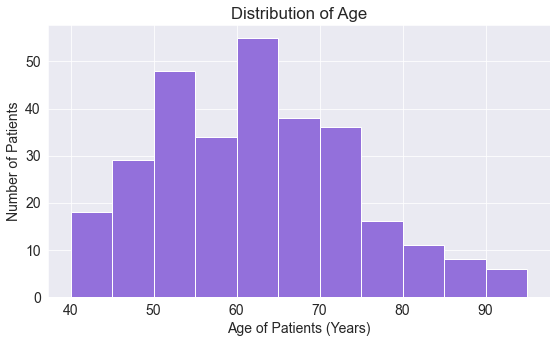

In [49]:
plt.hist(heart_failure_df.age, bins=np.arange(40,100, 5), color ='mediumpurple')
plt.xlabel("Age of Patients (Years)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age");

<p style='text-align:justify;'> Dari histogram di atas, terlihat jelas bahwa sebagian besar pasien berada di bawah kelompok usia 60-65 dan berikutnya adalah kelompok usia 50-55.</p>

<p style='text-align:justify;'>Harapan hidup seseorang di Pakistan pada tahun 2015 adalah sekitar 67 tahun. Terlihat jelas bahwa jumlah pasien yang tercatat mulai menurun dari kelompok usia 65-70 tahun. kita dapat melihat daftar lengkap harapan hidup orang di Pakistan (1950 - 2021) menggunakan tautan yang diberikan di bagian referensi.</p>

### Gender

<p style='text-align:justify;'> Distribusi jenis kelamin gagal jantung merupakan faktor penting lainnya yang harus diperhatikan. Mari kita visualisasikan distribusi gender menggunakan pie chart. </p>

In [50]:
#to store the gender counts into a variable
gender_counts = heart_failure_df.sex.value_counts()

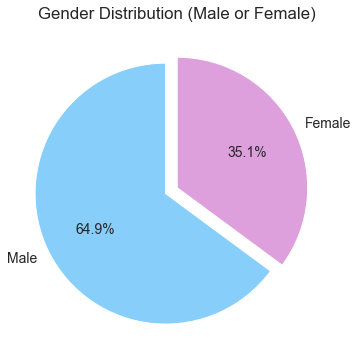

In [51]:
plt.figure(figsize=(12, 6))
plt.pie(gender_counts, labels = gender_counts.index, autopct ='%.1f%%', startangle = 90, explode = [0.1, 0], colors = ['lightskyblue', 'plum'])
plt.title("Gender Distribution (Male or Female)");

<p style='text-align:justify;'> Seperti yang dapat kita lihat dengan jelas, hanya 35,1% pasien gagal jantung dalam pengamatan kita adalah perempuan. Ini berarti bahwa kita memiliki lebih banyak jumlah pasien laki-laki jika dibandingkan dengan perempuan. Jadi, kita dapat dengan mudah mengatakan bahwa dataset ini sedikit tidak seimbang (imbalanced dataset). </p>

### Death

  <p style='text-align:justify;'> Mari kita periksa hubungan antara kematian pasien dengan kelompok usia dan jenis kelaminnya. </p>

#### Date Rate
  <p style='text-align:justify;'>
Faktor penting untuk dilihat adalah persentase pasien meninggal selama masa tindak lanjut. Mari gunakan pie chart untuk memvisualisasikan. </p>

In [52]:
#count number of patients dead
dead_counts = heart_failure_df.patient_dead.value_counts()
dead_counts 

False    203
True      96
Name: patient_dead, dtype: int64

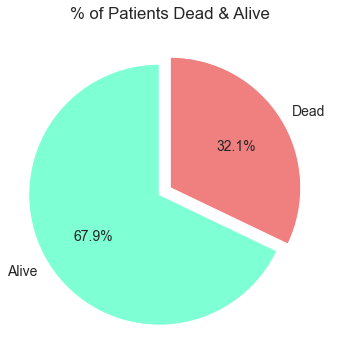

In [53]:
plt.figure(figsize=(12, 6))
plt.pie(dead_counts, labels = ['Alive', 'Dead'] , autopct ='%.1f%%', startangle = 90, explode=[0.1, 0], colors =['aquamarine', 'lightcoral'])
plt.title("% of Patients Dead & Alive");

<p style='text-align:justify;'> Seperti yang dapat kita lihat dengan jelas, persentase pasien meninggal selama masa tindak lanjut adalah 32,1%. Ini mungkin karena data yang disebutkan dalam dataframe hanya sesuai dengan periode waktu tertentu (15 April - 15 Desember) dan lebih banyak pasien mungkin meninggal setelah periode ini yang tidak dicatat. </p>

#### Death and Age Group 

<p style='text-align:justify;'> Mari kita definisikan fungsi untuk membuat kolom lain dalam datframe yang menjelaskan kelompok usia pasien gagal jantung. Karena, usia pasien berkisar antara 40 hingga 95 tahun. Mari kita kelompokkan mereka ke dalam kategori seperti '40-45', '45-50', '50-55', '55-60' dan seterusnya. Kelompok usia pasien membantu kita untuk dengan mudah memahami dan memvisualisasikan hubungan berbagai atribut dengan usia. </p>

In [54]:
def create_range_series(number_series):
    """Creates a series with range(group) for the numeric values 
    provided in another series which is passed as an argument.
    This function takes only one argument which is (Pandas) series object, 
    returns another (Pandas) series object. 
    
    Argument:
        number_series - A column in pandas data frame with numeric values. 
    """
    condition = [
    (number_series >= 0) & (number_series < 5), 
    (number_series >= 5) & (number_series < 10), 
    (number_series >= 10) & (number_series < 15), 
    (number_series >= 15) & (number_series < 20), 
    (number_series >= 20) & (number_series < 25), 
    (number_series >= 25) & (number_series < 30), 
    (number_series >= 30) & (number_series < 35), 
    (number_series >= 35) & (number_series < 40), 
    (number_series >= 40) & (number_series < 45), 
    (number_series >= 45) & (number_series < 50), 
    (number_series >= 50) & (number_series < 55), 
    (number_series >= 55) & (number_series < 60), 
    (number_series >= 60) & (number_series < 65), 
    (number_series >= 65) & (number_series < 70), 
    (number_series >= 70) & (number_series < 75), 
    (number_series >= 75) & (number_series < 80), 
    (number_series >= 80) & (number_series < 85), 
    (number_series >= 85) & (number_series < 90), 
    (number_series >= 90) & (number_series < 95), 
    (number_series >= 95) & (number_series < 100)
    ]
    
    output = ['0-5', 
              '5-10', 
              '10-15', 
              '15-20', 
              '20-25', 
              '25-30', 
              '30-35', 
              '35-40', 
              '40-45', 
              '45-50', 
              '50-55', 
              '55-60', 
              '60-65', 
              '65-70', 
              '70-75', 
              '75-80', 
              '80-85', 
              '85-90', 
              '90-95', 
              '95-100'
              ] 
    result = np.select(condition, output, '>100')
    return pd.Series(result)

In [55]:
#to create a column with age group 
heart_failure_df['age_group'] = create_range_series(heart_failure_df.age)
heart_failure_df

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead,age_group
0,75,False,False,20,True,265,1.9,130,Male,False,True,75-80
1,55,False,False,38,False,263,1.1,136,Male,False,True,55-60
2,65,False,False,20,False,162,1.3,129,Male,True,True,65-70
3,50,True,False,20,False,210,1.9,137,Male,False,True,50-55
4,65,True,True,20,False,327,2.7,116,Female,False,True,65-70
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,True,38,True,155,1.1,143,Male,True,False,60-65
295,55,False,False,38,False,270,1.2,139,Female,False,False,55-60
296,45,False,True,60,False,742,0.8,138,Female,False,False,45-50
297,45,False,False,38,False,140,1.4,140,Male,True,False,45-50


<p style='text-align:justify;'> Sekarang kita telah membuat kolom baru dalam dataframe 'heart_failure_df' untuk kelompok usia menggunakan fungsi 'create_range_series', mari cari jumlah pasien yang meninggal sesuai dengan kelompok usia. </p>

In [56]:
dead_patients = heart_failure_df[heart_failure_df.patient_dead == True].groupby('age_group').count()
alive_patients = heart_failure_df[heart_failure_df.patient_dead == False].groupby('age_group').count()

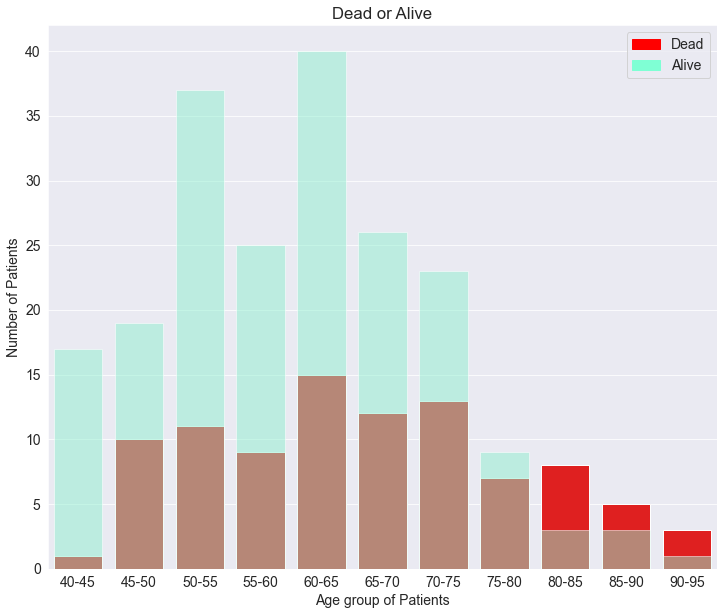

In [57]:
plt.figure(figsize=(12,10))
sns.barplot(x = dead_patients.index , y = dead_patients.patient_dead, alpha=1, palette =['red'])
sns.barplot(x = alive_patients.index, y = alive_patients.patient_dead, alpha = 0.5, palette = ['aquamarine'], estimator=sum, ci=None, )
plt.title('Dead or Alive')
plt.xlabel('Age group of Patients')
dead = mpatches.Patch(color= 'red', label='Dead')
alive = mpatches.Patch(color='aquamarine', label='Alive')
plt.legend(handles=[dead, alive])
plt.ylabel('Number of Patients');

<p style='text-align:justify;'> Seperti yang dapat kita lihat dengan jelas, bahwa ada lebih banyak jumlah pasien yang meninggal (selama masa tindak lanjut) pada kelompok usia 60-65 (yaitu 15 Pasien). Jelas, karena kita memiliki lebih banyak pasien dalam kelompok usia 60-65. Dan proporsi pasien meninggal mulai meningkat dari kelompok usia 65-70 dan jumlah pasien meninggal lebih banyak daripada pasien hidup pada kelompok usia '80-85', '85-90' dan '90-95'. Pasalnya, seiring berjalannya waktu, sistem imun tubuh secara alami menjadi kurang mampu menangani ancaman baru, seperti virus termasuk virus corona baru. Hal ini meningkatkan risiko memiliki masalah dengan berbagai penyakit. </p>

#### Death and Gender

  <p style='text-align:justify;'> Kita sudah melihat hubungan antara kelompok usia yang berbeda dan tingkat kematian. Sekarang mari kita lihat bagaimana tingkat kematian bervariasi sehubungan dengan jenis kelamin pasien. Mari kita gunakan fungsi 'countplot' dari library seaborn untuk memvisualisasikan.. </p>

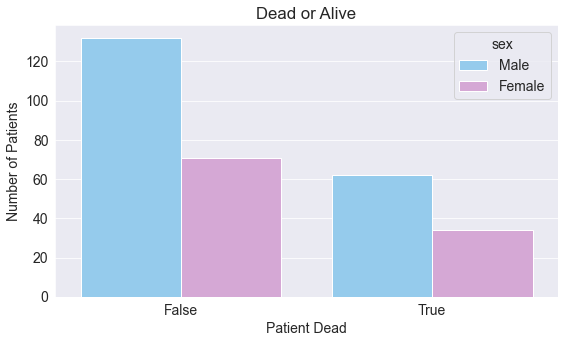

In [58]:
sns.countplot(x = heart_failure_df.patient_dead, hue = heart_failure_df.sex, palette =['lightskyblue', 'plum'])
plt.title('Dead or Alive')
plt.xlabel('Patient Dead')
plt.ylabel('Number of Patients');

<p style='text-align:justify;'> Kita dapat menyimpulkan dari output di atas, meskipun kita memiliki lebih banyak jumlah pasien laki-laki, proporsi pasien laki-laki dan perempuan meninggal selama masa tindak lanjut hampir sama. </p>

### Disease

  <p style='text-align:justify;'> Kita akan menganalisis jumlah pasien yang menderita anemia, diabetes, tekanan darah tinggi, kebiasaan merokok, fraksi ejeksi abnormal, kadar kreatinin dan natrium abnormal.</p>
  <p style='text-align:justify;'>
Jadi, mari kita buat kolom lain di dataframe untuk menunjukkan kelainan dari berbagai catatan.</p>
  <p style='text-align:justify;'>
Mari kita gunakan fungsi 'subplot' dari 'matplotlib.pyplot' untuk menampilkan 8 plot dalam satu output. </p>

In [59]:
#create columns to indicate abnormalities 
heart_failure_df['abnormal_ef'] = np.where(((heart_failure_df.ejection_fraction >= 55) & (heart_failure_df.ejection_fraction <=70)) , 'Normal', 'Abormal')
heart_failure_df['abnormal_platelets'] = np.where(((heart_failure_df.platelets >= 150) & (heart_failure_df.platelets <= 400)) , 'Normal', 'Abnormal')
heart_failure_df['abnormal_creatinine'] = np.where(((heart_failure_df.serum_creatinine >= 0.6) & (heart_failure_df.serum_creatinine <= 1.2)), 'Normal','Abnormal')
heart_failure_df['abnormal_sodium'] = np.where(((heart_failure_df.serum_sodium >= 135) & (heart_failure_df.serum_sodium <= 145)) , 'Normal', 'Abnormal') 

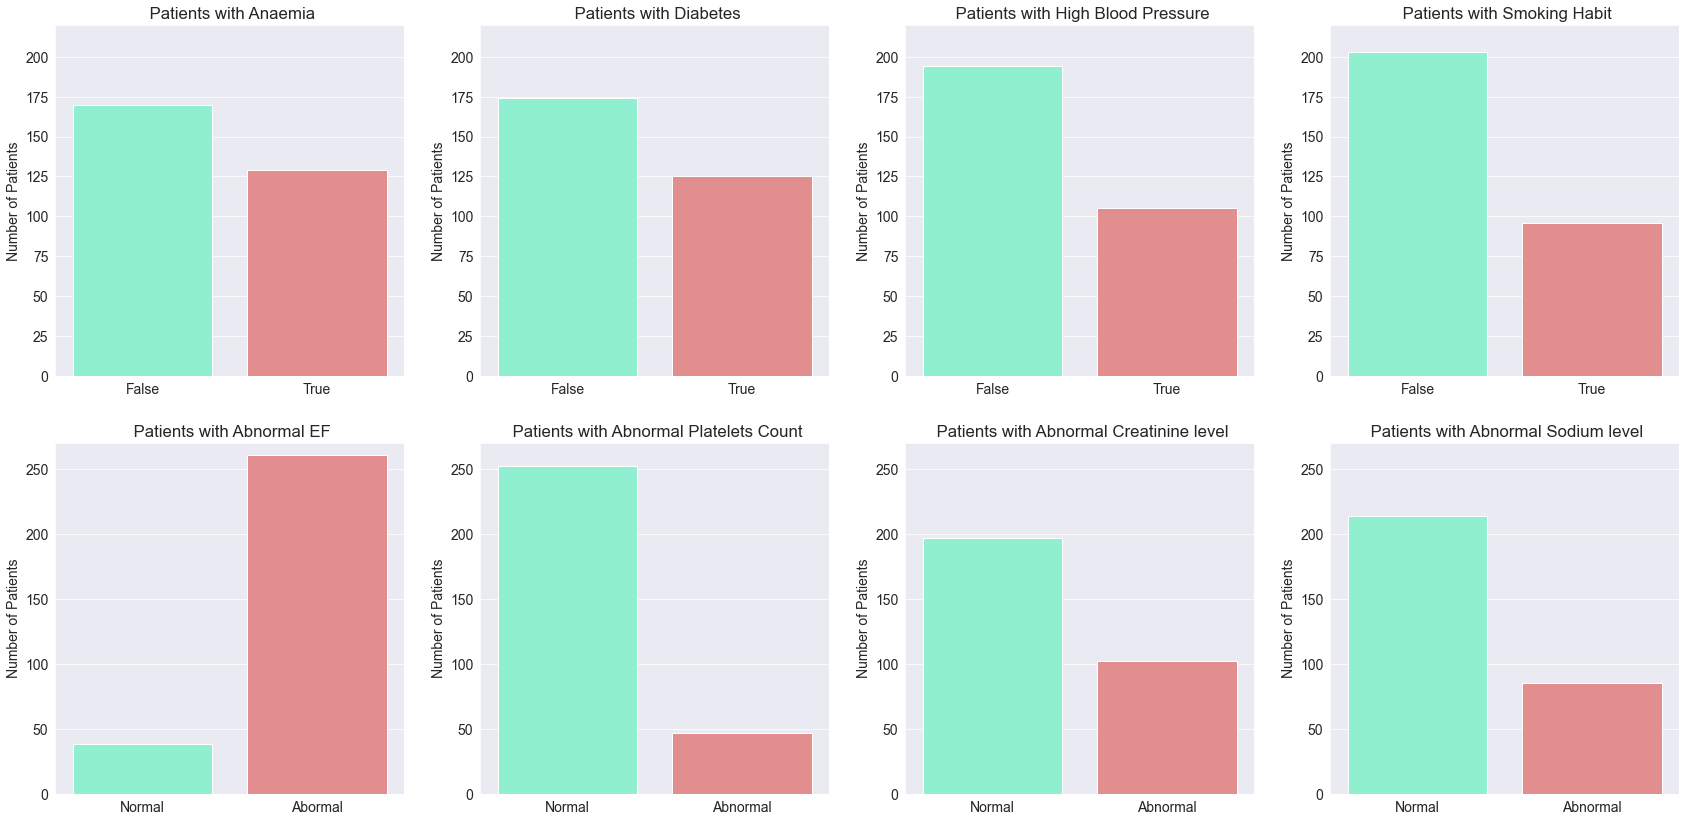

In [60]:
fig, axis = plt.subplots(2,4, figsize =(24, 12)) 
#axis(0,0) use this axis for Anaemia 
axis[0,0].set_title(" Patients with Anaemia")
sns.countplot(x = heart_failure_df.anaemia, ax=axis[0,0], palette=['aquamarine', 'lightcoral'] )
axis[0,0].set_xlabel("")
axis[0,0].set_ylabel("Number of Patients")
axis[0,0].set_ylim([0, 220])

#axis(0,1) use this axis for Diabetes 
axis[0,1].set_title(" Patients with Diabetes")
sns.countplot(x = heart_failure_df.diabetes, ax=axis[0,1], palette=['aquamarine', 'lightcoral'])
axis[0,1].set_xlabel("")
axis[0,1].set_ylabel("Number of Patients")
axis[0,1].set_ylim([0, 220])


#axis(0,2) use this axis for High blood pressure 
axis[0,2].set_title(" Patients with High Blood Pressure")
sns.countplot(x = heart_failure_df.high_blood_pressure, ax=axis[0,2], palette=['aquamarine', 'lightcoral'])
axis[0,2].set_xlabel("")
axis[0,2].set_ylabel("Number of Patients")
axis[0,2].set_ylim([0, 220])

#axis(0,3) use this axis for smoking habit 
axis[0,3].set_title(" Patients with Smoking Habit")
sns.countplot(x = heart_failure_df.smoking, ax=axis[0,3], palette=['aquamarine', 'lightcoral'])
axis[0,3].set_xlabel("")
axis[0,3].set_ylabel("Number of Patients")
axis[0,3].set_ylim([0, 220])


#axis(1,0) use this axis for Ejection Fraction 
axis[1,0].set_title(" Patients with Abnormal EF")
sns.countplot(x = heart_failure_df.abnormal_ef.sort_values(ascending =False) , ax=axis[1,0], palette=['aquamarine', 'lightcoral'])
axis[1,0].set_xlabel("")
axis[1,0].set_ylabel("Number of Patients")
axis[1,0].set_ylim([0, 270])

#axis(1,1) use this axis for Platelets count 
axis[1,1].set_title(" Patients with Abnormal Platelets Count")
sns.countplot(x = heart_failure_df.abnormal_platelets.sort_values(ascending =False) , ax=axis[1,1], palette=['aquamarine', 'lightcoral'])
axis[1,1].set_xlabel("")
axis[1,1].set_ylabel("Number of Patients")
axis[1,1].set_ylim([0, 270])

#axis(1,2) use this axis for Creatinine level 
axis[1,2].set_title(" Patients with Abnormal Creatinine level")
sns.countplot(x = heart_failure_df.abnormal_creatinine.sort_values(ascending =False), ax=axis[1,2], palette=['aquamarine', 'lightcoral'])
axis[1,2].set_xlabel("")
axis[1,2].set_ylabel("Number of Patients")
axis[1,2].set_ylim([0, 270])

#axis(1,3) use this axis for sodium level
axis[1,3].set_title(" Patients with Abnormal Sodium level")
sns.countplot(x = heart_failure_df.abnormal_sodium.sort_values(ascending =False), ax=axis[1,3], palette=['aquamarine', 'lightcoral'])
axis[1,3].set_xlabel("")
axis[1,3].set_ylabel("Number of Patients")
axis[1,3].set_ylim([0, 270])

#to provide spacing between adjacent plots
plt.tight_layout(pad=2);

<p style='text-align:justify;'> Seperti yang dapat kita identifikasi dengan jelas, bahwa kelainan pada Ejection Fraction (EF) adalah faktor paling umum pada pasien gagal jantung.</p>

  <p style='text-align:justify;'><b>"EF mengacu pada jumlah darah yang dipompa keluar dari ventrikel kiri setiap kali berkontraksi. Ventrikel kiri adalah ruang pemompaan utama jantung. Gagal jantung (HF) terjadi ketika jantung tidak dapat memompa cukup darah untuk memenuhi kebutuhan tubuh".</b></p>
  <p style='text-align:justify;'>
EF rendah adalah salah satu alasan utama yang menyebabkan gagal jantung, itulah alasan kita memiliki lebih banyak pasien dengan Fraksi Ejeksi abnormal.</p>
  <p style='text-align:justify;'>
Fraksi Ejeksi Abnormal diikuti oleh kadar kreatinin dan natrium yang abnormal masing-masing, faktor yang paling jarang terjadi pada pasien gagal jantung adalah Jumlah Trombosit yang abnormal (yaitu hanya 47 Pasien). </p>
  <p style='text-align:justify;'>
Jumlah Penderita Anemia, Diabetes dan Tekanan Darah Tinggi hampir sama dan berkisar antara 100 - 120 Penderita. </p>

#### Pairwise Relationship
  <p style='text-align:justify;'>
Pairplot memberikan hubungan berpasangan dalam kumpulan data. Katakanlah kita memiliki 5 variabel dalam sebuah dataset. Ketika kita mengimplementasikan pairplot dengan data ini, itu akan membuat plot antara 5 variabel tersebut. Katakanlah misalnya, variabel pertama akan diambil sebagai nilai sumbu x dan variabel lain akan diambil sebagai nilai sumbu y secara individual. Kita akan memiliki 5 plot untuk variabel pertama saja. Ini akan diulang untuk variabel lainnya juga.</p>
  <p style='text-align:justify;'>
Gagasan di balik pairplot adalah untuk memahami hubungan antara variabel yang ada dalam data.</p>
  <p style='text-align:justify;'>
Mari kita pisahkan kolom numerik dari kumpulan data untuk menerapkan fungsi 'pairplot' guna memahami hubungan antara atribut yang berbeda. </p>

In [61]:
#filter columns with numeric value
numeric_column = heart_failure_df[['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]

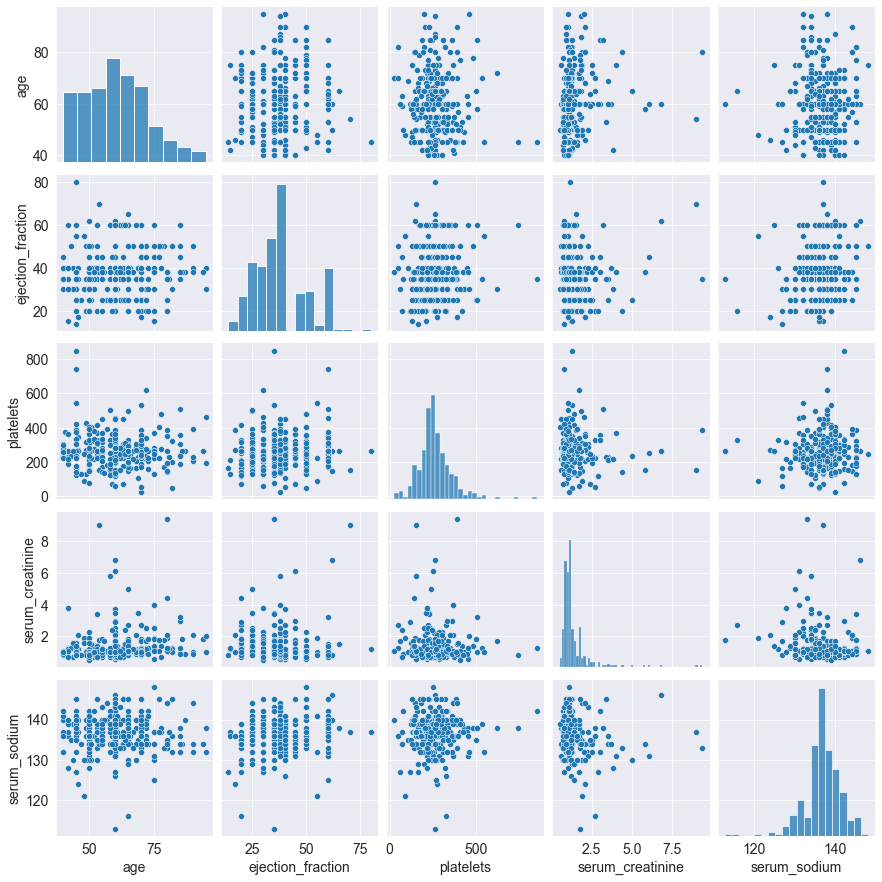

In [62]:
sns.pairplot(numeric_column);

<p style='text-align:justify;'> Dengan menggunakan fungsi 'pairplot', kita dapat dengan mudah memahami dan memvisualisasikan hubungan antara variabel yang berbeda. Sebagai contoh, dari output di atas kita menemukan bahwa hanya beberapa pasien yang memiliki kadar kreatinin dan natrium yang normal. </p>

#### Attributes - Distribution 
<p style='text-align:justify;'> Mari kita buat distribution plot untuk semua kolom dengan nilai numerik.</p>

<p style='text-align:justify;'><b> Distribution plot membantu kita menemukan apakah variabel terdistribusi normal atau miring. </b></p>



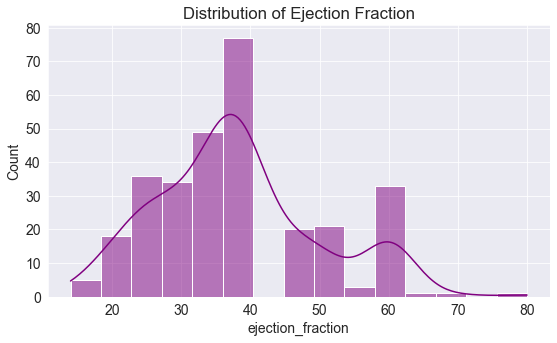

In [63]:
plt.title("Distribution of Ejection Fraction")
sns.histplot(heart_failure_df.ejection_fraction, kde = True, color ='purple');

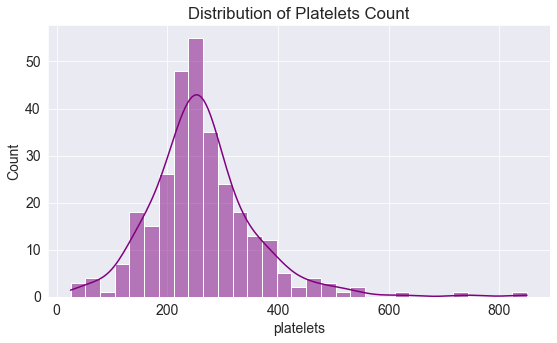

In [64]:
plt.title("Distribution of Platelets Count") 
sns.histplot(heart_failure_df.platelets, kde = True, color ='purple');

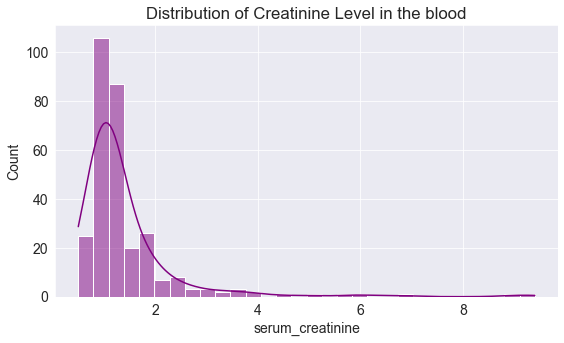

In [65]:
plt.title("Distribution of Creatinine Level in the blood") 
sns.histplot(heart_failure_df.serum_creatinine, kde = True, bins = 30, color ='purple');

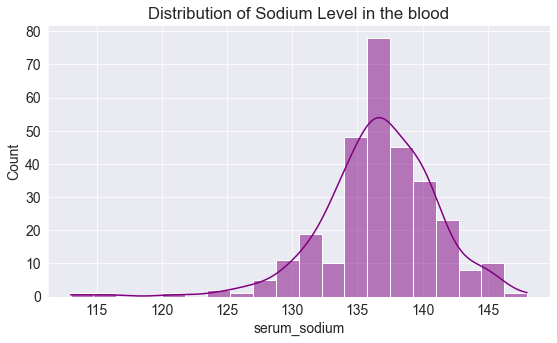

In [66]:
plt.title("Distribution of Sodium Level in the blood") 
sns.histplot(heart_failure_df.serum_sodium, kde = True, color ='purple');

<p style='text-align:justify;'> Sekarang kita telah membuat distribution plot untuk jumlah trombosit, tingkat kreatinin, tingkat natrium dan fraksi ejeksi dan jelas bahwa tidak ada nilai yang terdistribusi secara normal. Jumlah Trombosit, Fraksi Ejeksi dan Kadar Kreatinin miring ke kanan dan Kadar Natrium miring ke kiri. Jika kemiringan data lebih besar, kita mungkin harus melakukan beberapa modifikasi, untuk mendapatkan hasil yang lebih baik dari model Machine Learning setelah melatihnya.</p>

# Exploration

  <p style='text-align:justify;'> Kita telah memperoleh beberapa observasi tentang pasien gagal jantung dan catatan klinis dengan menjelajahi kolom individual dari kumpulan data. Mari kita ajukan beberapa pertanyaan spesifik dan kita akan mencoba menjawabnya menggunakan operasi dataframe dan visualisasi. </p>

#### Q: Berapa jumlah pasien dalam pengamatan? dari mereka ada berapa pasien laki-laki dan perempuan?

In [67]:
print("Total number of patients in our observation is {}.".format(heart_failure_df.shape[0]))

Total number of patients in our observation is 299.


In [68]:
print("Number of Male patients in our observation is {}.".format(heart_failure_df.sex.value_counts()[0]))
print("Number of Female patients in our observation is {}.".format(heart_failure_df.sex.value_counts()[1]))

Number of Male patients in our observation is 194.
Number of Female patients in our observation is 105.


#### Q: Berapa level normal dari Ejection Fraction? Berapa banyak pasien yang memiliki Fraksi Ejeksi abnormal?

In [69]:
print("The normal level of Ejection Fraction is {}.".format(column_details_df.normal_value['ejection_fraction']))

The normal level of Ejection Fraction is 55% - 70%.


In [70]:
print("Number of Patients with Normal Ejection Fraction rate is {}.".format(heart_failure_df[(heart_failure_df.ejection_fraction >= 55) & (heart_failure_df.ejection_fraction <= 70)].shape[0]))

Number of Patients with Normal Ejection Fraction rate is 38.


#### Q: Berapakah tingkat normal Jumlah Trombosit? Berapa banyak pasien yang memiliki Jumlah Trombosit abnormal?

In [71]:
print("The normal level of Platelets Count in human body is {}.".format(column_details_df.normal_value['platelets']))

The normal level of Platelets Count in human body is 150 - 400 kilo-platelets / mcL.


In [72]:
print("Number of Patients with Normal Platelets Count is {}.".format(heart_failure_df[(heart_failure_df.platelets >= 150) & (heart_failure_df.platelets <= 400)].shape[0]))

Number of Patients with Normal Platelets Count is 252.


#### Q: Berapa kadar normal kreatinin dalam darah? Berapa banyak pasien yang memiliki kadar kreatinin abnormal?

In [73]:
print("The normal level of Creatinine in the blood is {}.".format(column_details_df.normal_value['serum_creatinine']))

The normal level of Creatinine in the blood is 0.6 - 1.2 mg/dL.


In [74]:
print("Number of Patients with Normal Creatinine level in the blood is {}.".format(heart_failure_df[(heart_failure_df.serum_creatinine >= 0.6) & (heart_failure_df.serum_creatinine <= 1.2)].shape[0])) 

Number of Patients with Normal Creatinine level in the blood is 197.


#### Q: Berapa kadar normal Natrium dalam darah? Berapa banyak pasien yang memiliki kadar Natrium abnormal?

In [75]:
print("The normal level of Sodium in the blood is {}.".format(column_details_df.normal_value['serum_sodium']))

The normal level of Sodium in the blood is 135 - 145 mEq /L.


In [76]:
print("Number of Patients with Normal Sodium level in the blood is {}.".format(heart_failure_df[(heart_failure_df.serum_sodium >= 135) & (heart_failure_df.serum_sodium <= 145)].shape[0])) 

Number of Patients with Normal Sodium level in the blood is 214.


#### Q: Berapa banyak pasien yang memiliki kebiasaan merokok? dari mereka ada berapa pasien laki-laki dan perempuan?

In [77]:
heart_failure_df[heart_failure_df.smoking == True]

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead,age_group,abnormal_ef,abnormal_platelets,abnormal_creatinine,abnormal_sodium
2,65,False,False,20,False,162,1.3,129,Male,True,True,65-70,Abormal,Normal,Abnormal,Abnormal
5,90,True,False,40,True,204,2.1,132,Male,True,True,90-95,Abormal,Normal,Abnormal,Abnormal
7,60,True,True,60,False,454,1.1,131,Male,True,True,60-65,Normal,Abnormal,Normal,Abnormal
9,80,True,False,35,True,388,9.4,133,Male,True,True,80-85,Abormal,Normal,Abnormal,Abnormal
10,75,True,False,38,True,368,4.0,131,Male,True,True,75-80,Abormal,Normal,Abnormal,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52,False,True,38,False,382,1.0,140,Male,True,False,50-55,Abormal,Normal,Normal,Normal
293,63,True,True,35,False,179,0.9,136,Male,True,False,60-65,Abormal,Normal,Normal,Normal
294,62,False,True,38,True,155,1.1,143,Male,True,False,60-65,Abormal,Normal,Normal,Normal
297,45,False,False,38,False,140,1.4,140,Male,True,False,45-50,Abormal,Abnormal,Abnormal,Normal


In [78]:
print("Number of Patients with Smoking Habit is {}.".format(heart_failure_df[heart_failure_df.smoking == True].shape[0]))

Number of Patients with Smoking Habit is 96.


In [79]:
smokers = heart_failure_df[heart_failure_df.smoking == True].groupby('sex').count()
smokers = smokers['smoking']
smokers

sex
Female     4
Male      92
Name: smoking, dtype: int64

In [80]:
print("Number of Male Patients with Smoking Habit is {}.".format(smokers[1]))

Number of Male Patients with Smoking Habit is 92.


In [81]:
print("Number of Female Patients with Smoking Habit is {}.".format(smokers[0]))

Number of Female Patients with Smoking Habit is 4.


#### Q: Berapa banyak pasien yang menderita anemia atau diabetes atau tekanan darah tinggi?

In [82]:
anaemia_patients = heart_failure_df[heart_failure_df.anaemia == True].shape[0]
diabetes_patients = heart_failure_df[heart_failure_df.diabetes == True].shape[0]
high_bp_patients = heart_failure_df[heart_failure_df.high_blood_pressure == True].shape[0]

In [83]:
print("Number of Patients with Anaemia is {}.".format(anaemia_patients))
print("Number of Patients with Diabetes is {}.".format(diabetes_patients))
print("Number of Patients with High Blood Pressure is {}.".format(high_bp_patients))

Number of Patients with Anaemia is 129.
Number of Patients with Diabetes is 125.
Number of Patients with High Blood Pressure is 105.


#### Q: Berapa banyak pasien yang mengalami keduanya (anemia & diabetes) atau (anemia & tekanan darah tinggi) atau (diabetes & tekanan darah tinggi)? Dan berapa banyak pasien yang memiliki ketiganya?

In [84]:
anaemia_diabetes = heart_failure_df[(heart_failure_df.anaemia == True) & (heart_failure_df.diabetes == True)].shape[0]
anaemia_high_bp = heart_failure_df[(heart_failure_df.anaemia == True) & (heart_failure_df.high_blood_pressure == True)].shape[0]
diabetes_high_bp = heart_failure_df[(heart_failure_df.high_blood_pressure == True) & (heart_failure_df.diabetes == True)].shape[0]   

In [85]:
print("Number of Patients with Anaemia and Diabetes is {}.".format(anaemia_diabetes))
print("Number of Patients with Anaemia and High Blood Pressure is {}.".format(anaemia_high_bp))
print("Number of Patients with Diabetes and High Blood Pressure is {}.".format(diabetes_high_bp))

Number of Patients with Anaemia and Diabetes is 53.
Number of Patients with Anaemia and High Blood Pressure is 48.
Number of Patients with Diabetes and High Blood Pressure is 43.


In [86]:
all_three = heart_failure_df[(heart_failure_df.anaemia == True) & (heart_failure_df.diabetes == True) & (heart_failure_df.high_blood_pressure == True)].shape[0]
all_three

17

In [87]:
print("Number of Patients with Anaemia, Diabetes and High Blood Pressure is {}.".format(all_three))


Number of Patients with Anaemia, Diabetes and High Blood Pressure is 17.


#### Q: Berapa banyak pasien yang meninggal selama masa tindak lanjut? dari mereka ada berapa pasien pria dan wanita?

In [88]:
heart_failure_df[heart_failure_df.patient_dead == True].shape[0]

96

In [89]:
print("Number of Patients died during follow-up period is {}.".format(heart_failure_df[heart_failure_df.patient_dead == True].shape[0]))

Number of Patients died during follow-up period is 96.


In [90]:
male_dead = heart_failure_df[(heart_failure_df.patient_dead == True) & (heart_failure_df.sex == 'Male')].shape[0]
female_dead = heart_failure_df[(heart_failure_df.patient_dead == True) & (heart_failure_df.sex == 'Female')].shape[0]

In [91]:
print("Number of Male Patients died during follow-up period is {}.".format(male_dead))
print("Number of Female Patients died during follow-up period is {}.".format(female_dead))

Number of Male Patients died during follow-up period is 62.
Number of Female Patients died during follow-up period is 34.


#### Q: Penyakit/kelainan apa yang paling umum dan paling jarang terjadi pada pasien gagal jantung?

In [92]:
heart_failure_df.columns

Index(['age', 'anaemia', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'patient_dead', 'age_group', 'abnormal_ef',
       'abnormal_platelets', 'abnormal_creatinine', 'abnormal_sodium'],
      dtype='object')

In [93]:
dict = ({heart_failure_df.columns[3]:abn_ef.shape[0]} , {heart_failure_df.columns[5]:abn_platelets.shape[0]} , {heart_failure_df.columns[6]:abn_creatinine.shape[0]}, {heart_failure_df.columns[7]: abn_sodium.shape[0]} , {heart_failure_df.columns[1]:anaemia_patients} , {heart_failure_df.columns[2]:diabetes_patients} , {heart_failure_df.columns[4]:high_bp_patients})
print (dict)
print (max(abn_ef.shape[0], abn_platelets.shape[0], abn_creatinine.shape[0], abn_sodium.shape[0], anaemia_patients , diabetes_patients , high_bp_patients )) 
print (min(abn_ef.shape[0], abn_platelets.shape[0], abn_creatinine.shape[0], abn_sodium.shape[0], anaemia_patients , diabetes_patients , high_bp_patients )) 

({'ejection_fraction': 261}, {'platelets': 47}, {'serum_creatinine': 102}, {'serum_sodium': 85}, {'anaemia': 129}, {'diabetes': 125}, {'high_blood_pressure': 105})
261
47


In [94]:
print("The most common abnormality or disease among the heart failure patients is Ejection Fraction and 261 Patients had abnormal Ejection Fraction.")

The most common abnormality or disease among the heart failure patients is Ejection Fraction and 261 Patients had abnormal Ejection Fraction.


In [95]:
heart_failure_df[(heart_failure_df.platelets < 150) | (heart_failure_df.platelets >400)].shape [0]

47

In [96]:
print("The least common abnormality or disease among the heart failure patients is Abnormal Platelets Count and 47 Patients had abnormal Platelets Count.")

The least common abnormality or disease among the heart failure patients is Abnormal Platelets Count and 47 Patients had abnormal Platelets Count.


#### Q: Apakah kebiasaan merokok mempengaruhi kehidupan pasien gagal jantung?

In [97]:
smokers

sex
Female     4
Male      92
Name: smoking, dtype: int64

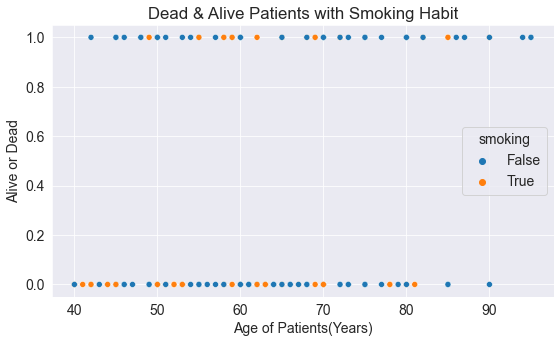

In [98]:
plt.title('Dead & Alive Patients with Smoking Habit')
plt.xlabel('Age of Patients(Years)')
plt.ylabel('Alive or Dead')
sns.scatterplot(x = 'age', y = 'patient_dead', hue = 'smoking', data = heart_failure_df);

<p style='text-align:justify;'> Dari hasil di atas, kita dapat menyimpulkan bahwa jumlah pasien dengan kebiasaan merokok yang meninggal selama masa tindak lanjut lebih sedikit jika dibandingkan dengan pasien yang masih hidup dengan kebiasaan merokok. Hal ini menunjukkan bahwa kebiasaan merokok memiliki dampak yang sangat kecil terhadap kehidupan pasien gagal jantung.</p>
  <p style='text-align:justify;'>
Total 30 perokok meninggal selama masa tindak lanjut, mari kita periksa catatan masing-masing pasien untuk dianalisis.</p>

In [99]:
heart_failure_df [(heart_failure_df.patient_dead == True) & (heart_failure_df.smoking == True )]

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead,age_group,abnormal_ef,abnormal_platelets,abnormal_creatinine,abnormal_sodium
2,65,False,False,20,False,162,1.30,129,Male,True,True,65-70,Abormal,Normal,Abnormal,Abnormal
5,90,True,False,40,True,204,2.10,132,Male,True,True,90-95,Abormal,Normal,Abnormal,Abnormal
7,60,True,True,60,False,454,1.10,131,Male,True,True,60-65,Normal,Abnormal,Normal,Abnormal
9,80,True,False,35,True,388,9.40,133,Male,True,True,80-85,Abormal,Normal,Abnormal,Abnormal
10,75,True,False,38,True,368,4.00,131,Male,True,True,75-80,Abormal,Normal,Abnormal,Abnormal
11,62,False,False,25,True,253,0.90,140,Male,True,True,60-65,Abormal,Normal,Normal,Normal
22,68,True,False,35,True,289,0.90,140,Male,True,True,65-70,Abormal,Normal,Normal,Normal
25,80,False,True,38,False,149,1.90,144,Male,True,True,80-85,Abormal,Abnormal,Abnormal,Normal
27,70,False,True,45,True,284,1.30,136,Male,True,True,70-75,Abormal,Normal,Abnormal,Normal
29,82,False,True,30,False,200,1.20,132,Male,True,True,80-85,Abormal,Normal,Normal,Abnormal


In [100]:
heart_failure_df [(heart_failure_df.patient_dead == True) & (heart_failure_df.smoking == True ) & (heart_failure_df.abnormal_ef == 'Normal')].shape 

(2, 16)

In [101]:
heart_failure_df [(heart_failure_df.patient_dead == True) & (heart_failure_df.smoking == True ) & (heart_failure_df.abnormal_creatinine == 'Normal')].shape 

(16, 16)

<p style='text-align:justify;'> Karena, kita telah mengetahui bahwa faktor paling umum pada pasien gagal jantung adalah Fraksi Ejeksi diikuti oleh kadar kreatinin dalam darah yang tidak normal. 2 Pasien dengan kebiasaan merokok meninggal, meskipun memiliki Fraksi Ejeksi Normal dan 16 Pasien meninggal karena kebiasaan merokok, meskipun memiliki Kadar Kreatinin Normal dalam darah. </p>
  <p style='text-align:justify;'>
Jadi, dapat disimpulkan bahwa kebiasaan merokok pasti berdampak kecil pada kehidupan pasien gagal jantung. </p>

## Inferences and Conclusions

Kita telah menarik banyak kesimpulan dari survei. Berikut ringkasan beberapa di antaranya:
<ul style='text-align:justify;'><li>
Berdasarkan jenis kelamin pasien yang tercatat, kita dapat menyimpulkan bahwa dataset sedikit tidak seimbang (imbalanced dataset), karena hanya 35,1% Pasien adalah Wanita.</li>
<li>Kita memiliki lebih banyak jumlah pasien di bawah kelompok usia 60-65 dan berikutnya kelompok usia 50-55. Dan jumlah pasien yang tercatat mulai menurun dari kelompok usia 65-70 tahun, terlihat jelas karena usia harapan hidup seseorang di Pakistan pada tahun 2015 adalah sekitar 67 tahun.</li>

<li>32,1% pasien meninggal selama masa tindak lanjut. Ini mungkin karena data yang disebutkan dalam dataset hanya sesuai dengan periode waktu tertentu (15 April - 15 Desember) dan lebih banyak pasien mungkin meninggal setelah periode ini (yang tidak dicatat).</li >

<li>Maksimum pasien meninggal (selama masa tindak lanjut) di bawah kelompok usia 60-65 (yaitu 15 Pasien). Jelas, karena kita memiliki lebih banyak pasien dalam kelompok usia 60-65. Dan proporsi pasien meninggal mulai meningkat dari kelompok usia 65-70 dan jumlah pasien meninggal lebih banyak daripada pasien hidup pada kelompok usia 80-85, 85-90 dan 90-95. Pasalnya, seiring berjalannya waktu, sistem imun tubuh secara alami menjadi kurang mampu menangani ancaman baru, seperti virus termasuk virus corona baru. Hal ini meningkatkan risiko mengalami masalah dengan berbagai penyakit yang pada akhirnya berujung pada kematiannya.</li>

<li>Proporsi pasien pria dan wanita yang meninggal selama masa tindak lanjut hampir sama (yaitu ~32%).</li>

<li>Abnormalitas pada Ejection Fraction (EF) merupakan faktor yang paling sering terjadi pada pasien gagal jantung. Fraksi Ejeksi Abnormal diikuti oleh kadar kreatinin dan natrium yang abnormal dalam darah masing-masing, faktor yang paling jarang terjadi pada pasien gagal jantung adalah Jumlah Trombosit yang abnormal (yaitu hanya 47 Pasien).</li>

<li>Tidak ada nilai rekam medis yang berdistribusi normal. Jumlah Trombosit, Fraksi Ejeksi, dan Kadar Kreatinin miring ke kanan dan Kadar Natrium miring ke kiri.</li>

<li>Kelainan atau penyakit yang paling banyak diderita oleh pasien gagal jantung adalah Ejeksi Fraksi dan 261 Pasien memiliki Fraksi Ejeksi abnormal.</li>

<li>Kelainan atau penyakit yang paling jarang ditemukan pada pasien gagal jantung adalah Jumlah Trombosit Tidak Normal dan 47 Pasien memiliki Jumlah Trombosit abnormal.</li>

<li>Meskipun mereka memiliki fraksi ejeksi normal dan kadar kreatinin normal dalam darah, beberapa pasien dengan kebiasaan merokok meninggal. Jadi, dapat disimpulkan bahwa kebiasaan merokok berdampak kecil terhadap harapan hidup pasien gagal jantung.</li> </ul>

# References and Future work
### Referensi
  <p style='text-align:justify;'>
Lihat sumber daya berikut untuk mempelajari lebih lanjut tentang dataset, atribut, dan tools yang digunakan dalam notebook ini:</p>

- Heart Failure Clinical Records Dataset in Kaggle:
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

- Advanced study in Heart Failure Patients Dataset:
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

- Attributes Information Table:
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1

- Ejection Fraction (Fraksi Ejeksi):
https://my.clevelandclinic.org/health/articles/16950-ejection-fraction

- Platelets (Trombosit):
https://www.ucsfhealth.org/medical-tests/platelet-count

- Serum Creatinine (Kreatinin Serum):
https://www.medicinenet.com/creatinine_blood_test/article.htm

- Serum Sodium (Natrium Serum):
https://www.healthcheckup.com/general/normal-sodium-levels-in-blood/

- Life expectancy in Pakistan:
https://www.macrotrends.net/countries/PAK/pakistan/life-expectancy

- Pandas user guide: 
https://pandas.pydata.org/docs/user_guide/index.html

- Matplotlib user guide:
https://matplotlib.org/3.3.1/users/index.html

- Seaborn user guide & tutorial:
https://seaborn.pydata.org/tutorial.html

- `opendatasets` Python library: https://github.com/JovianML/opendatasets

- Data Visualization in Python:
https://medium.com/@siddhardhan23/data-visualization-in-python-a90ddb706b23
